In [22]:
# https://blog.csdn.net/weixin_42152885/article/details/80239226

#资本资产进价模型(CAPM)---利用美的集团做实证
#Rp=Rf+β*(E(Rm)-Rf)+ε
#cmd---pip install tushare

#载入股指数据
import tushare as ts
mydf_sz = ts.get_hist_data('sz',start='2005-01-01',end='2019-5-7')
mydf_sh = ts.get_hist_data('sh',start='2005-01-01',end='2019-5-7')
# 
mydf_sh_md = ts.get_hist_data('000002',start='2005-01-01',end='2019-5-7')
mydf_sh_md.head()

,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,v_ma5,v_ma10,v_ma20
date,,,,,,,,,,,,,
2019-12-31,31.35,32.45,32.18,31.32,663498.00,0.61,1.93,31.232,31.057,29.707,771234.79,791237.19,865322.99
2019-12-30,31.35,31.79,31.57,31.02,915751.44,0.57,1.84,30.872,30.884,29.498,789520.15,884537.41,861997.17
2019-12-27,31.23,31.32,31.00,30.81,703096.50,-0.12,-0.39,30.760,30.672,29.322,734136.99,982568.55,866551.79
2019-12-26,30.50,31.30,31.12,30.50,888790.75,0.83,2.74,30.896,30.387,29.157,772191.30,1055395.95,853800.21
2019-12-25,30.40,30.63,30.29,30.18,685037.25,-0.09,-0.30,30.878,30.075,28.991,766660.46,1022899.66,831358.75


In [16]:

import pandas as pd
sh_md_merge = pd.merge(pd.DataFrame(mydf_sh.p_change),
                       pd.DataFrame(mydf_sh_md.p_change),
                       left_index=True,right_index=True,how='inner')

#计算日无风险利率
Rf_annual=0.0385  #以2017年中国一年期的国债利率为无风险利率
Rf_daily=(1+Rf_annual)**(1/365)-1  #年利率转化为日利率
 
#计算风险溢价:Ri-Rf
risk_premium=sh_md_merge-Rf_daily;
risk_premium.head()


,p_change_x,p_change_y
date,,
2019-12-31,0.329896,1.929896
2019-12-30,1.159896,1.839896
2019-12-27,-0.080104,-0.390104
2019-12-26,0.849896,2.739896
2019-12-25,-0.030104,-0.300104


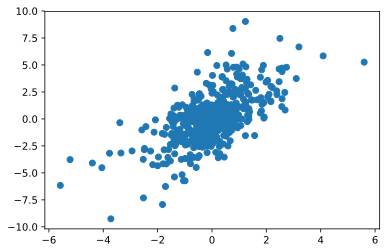

In [17]:
#画出两个风险溢价的散点图，查看相关性
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

plt.scatter(risk_premium.values[:,0],risk_premium.values[:,1])
plt.show()

In [21]:
sh_md_merge.info()


<class 'pandas.core.frame.DataFrame'>
Index: 505 entries, 2019-12-31 to 2017-12-06
Data columns (total 2 columns):
p_change_x    505 non-null float64
p_change_y    505 non-null float64
dtypes: float64(2)
memory usage: 31.8+ KB


In [19]:
##利用最小二乘法进行线性回归，拟合CAPM模型
import statsmodels.api as sm
md_capm=sm.OLS(risk_premium.p_change_y[1:],sm.add_constant(risk_premium.p_change_x[1:]))
result=md_capm.fit()
print(result.summary())

#拟合结果：Rp-Rf=0.2185+1.1539(Rm-Rf)+ε
#参数检验通过了，但是R^2不是很理想

                            OLS Regression Results                            
Dep. Variable:             p_change_y   R-squared:                       0.410
Model:                            OLS   Adj. R-squared:                  0.409
Method:                 Least Squares   F-statistic:                     348.8
Date:                Sun, 07 Jun 2020   Prob (F-statistic):           1.73e-59
Time:                        16:55:16   Log-Likelihood:                -997.43
No. Observations:                 504   AIC:                             1999.
Df Residuals:                     502   BIC:                             2007.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0566      0.078      0.725      0.4

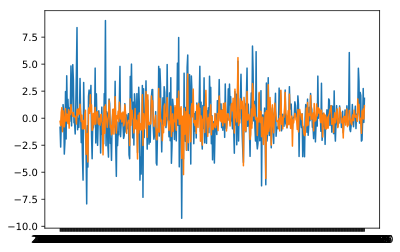

In [27]:
# plt.title('wanke')
plt.plot(mydf_sh_md.index.get_level_values(0).values[1:], risk_premium.p_change_y[1:])
plt.plot(mydf_sh_md.index.get_level_values(0).values[1:], risk_premium.p_change_x[1:])
# plt.legend(['wanke','Rp','SML'])
plt.show()

